In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

%matplotlib inline
import matplotlib.pyplot as plt

from utils import XyScaler
from roc_curve2 import roc_curve

In [3]:
checker = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv')

In [4]:
df_withID = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/ready12_24_train.csv')

In [5]:
#checker['patient_event'] = df_withID['patient_event']

In [57]:
df_withID.head(3)

,Patient_ID_x,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Category1_x,Category2,Category3,Camp_Start_Date2,Camp_End_Date2,patient_event,Unnamed: 0_x,Unnamed: 0.1_x,Online_Follower_x,First_Interaction,City_Type,Employer_Category,Job_Type,Event1_or_2_x,online_score,Category1_y,Unnamed: 0_y,Unnamed: 0.1_y,Patient_ID_y,Online_Follower_y,Event1_or_2_y,y_target,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_length,delta_first_reg,interaction_regreister_delta,delta_first_start,delta_reg_end,Camp_Length
0,489652,6578,2005-09-10,4.0,0.0,0.0,0.0,2.0,Third,G,2100,2005-08-16,2005-10-14,4896526578,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,Third,6898.0,6898.0,489652.0,0.0,1.0,1.0,NaN,2.0,1.0,59 days,-25.0,278,253,34,59
1,489652,6532,2005-03-15,0.0,0.0,0.0,0.0,0.0,First,F,2100,2005-02-19,2005-08-23,4896526532,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-24.0,99,75,161,185
2,489652,6543,2005-11-26,4.0,0.0,0.0,0.0,2.0,First,F,2100,2005-09-27,2007-11-07,4896526543,6898,6898,0,2004-12-06,23384,NaN,9999.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,-60.0,355,295,711,771


In [6]:
plt.rcParams['figure.dpi'] = 200

In [7]:
from numpy import argmax 

In [8]:
import seaborn as sns
'''
 6   delta_first_reg               75278 non-null  float64
 7   interaction_regreister_delta  75278 non-null  float64
 8   delta_first_start             75278 non-null  float64
 9   delta_reg_end                 75278 non-null  float64

'''

'\n 6   delta_first_reg               75278 non-null  float64\n 7   interaction_regreister_delta  75278 non-null  float64\n 8   delta_first_start             75278 non-null  float64\n 9   delta_reg_end                 75278 non-null  float64\n\n'

<AxesSubplot:>

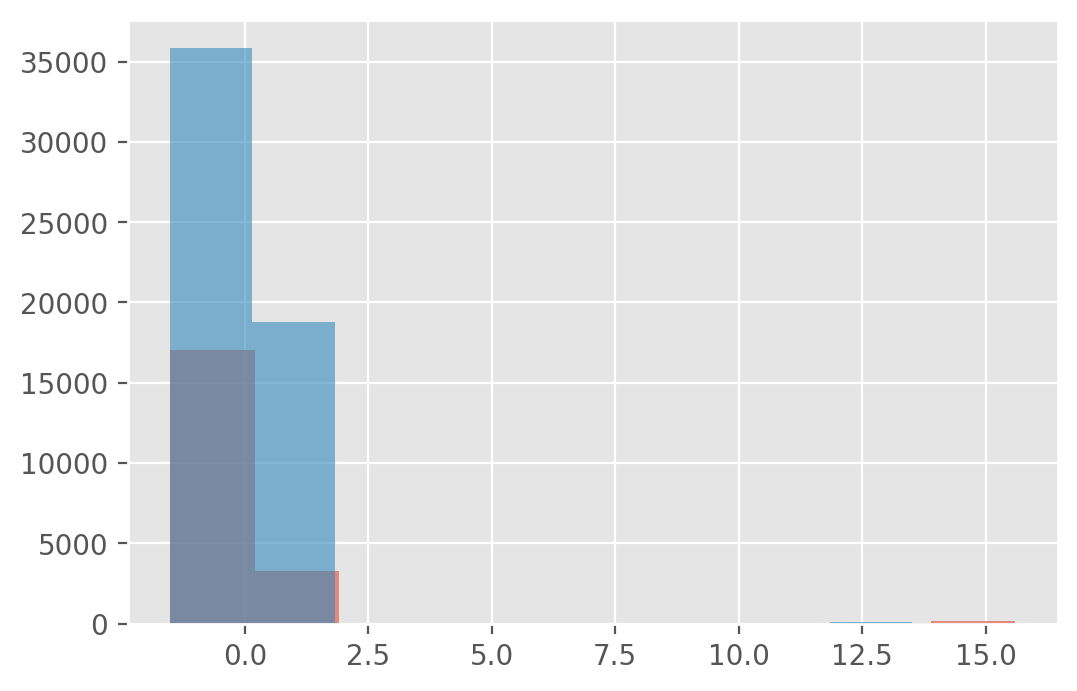

In [9]:
# make hist 
checker[checker['y_target'] ==1]['delta_first_reg'].hist(alpha=.6)
checker[checker['y_target'] ==0]['delta_first_reg'].hist(alpha=.6)


In [10]:
checker2 = checker.copy() 

In [11]:
some_check = checker.dropna(axis=1)
#print(some_check.info())

In [12]:
l1_ratio = 0.4

C=1.00
Sparsity with L1 penalty:                2.17%
Sparsity with Elastic-Net penalty:       0.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.79
Score with Elastic-Net penalty:          0.79
Score with L2 penalty:                   0.79
C=0.10
Sparsity with L1 penalty:                23.91%
Sparsity with Elastic-Net penalty:       8.70%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.79
Score with Elastic-Net penalty:          0.79
Score with L2 penalty:                   0.79
C=0.01
Sparsity with L1 penalty:                67.39%
Sparsity with Elastic-Net penalty:       50.00%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.79
Score with Elastic-Net penalty:          0.79
Score with L2 penalty:                   0.79


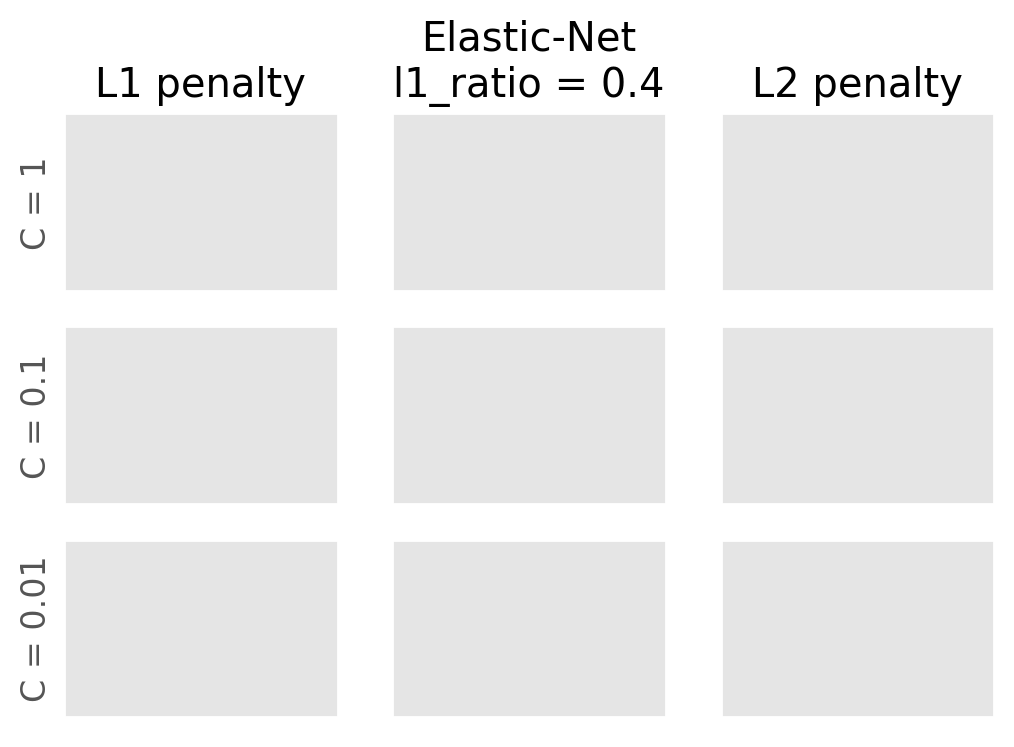

In [13]:
fig, axes = plt.subplots(3, 3)
 
ynot2 = checker2.pop('y_target')
train_test_split(ynot2, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker2,ynot2,test_size = .5, random_state=101)

for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
     
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_en_LR = LogisticRegression(C=C, penalty='elasticnet', solver='saga',
                                   l1_ratio=l1_ratio, tol=0.01)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    clf_en_LR.fit(X_train, y_train)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:",
                                  sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:",
                                 clf_l1_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Score with Elastic-Net penalty:",
                                 clf_en_LR.score(X_train, y_train)))
    print("{:<40} {:.2f}".format("Score with L2 penalty:",
                                 clf_l2_LR.score(X_train, y_train)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):

        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel('C = %s' % C)

plt.show()

In [15]:
checker_base.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', '1217', '1352',
       '1704', '1729', '2517', '2662', '3.0', '4.0', '6.0', '7.0', '11.0',
       '12.0', '13.0', '14.0'],
      dtype='object')

In [16]:
cb1 = checker_base.copy() 
cb2 = checker_base.copy()
cb3 = checker_base.copy() 
cb4 = checker_base.copy() 
cb5 = checker_base.copy()  
cb7 = checker_base.copy()  
cb9 = checker_base.copy()  
cb10 = checker_base.copy()  
cb11 = checker_base.copy()  
cb12 = checker_base.copy()  
cb20 = checker_base.copy()  

In [17]:
checkerxx = checker.copy()

In [18]:
checker.columns 

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'],
      dtype='object')

In [19]:
checker = checker.copy()
checker = checker.drop(['Var4','11.0', '12.0', '13.0', '14.0','1217', '1352',
       '1704', '1729', '2517', '2662','7.0','4.0','6.0','3.0'],axis=1)
checker1 = checker.copy() 

checker3 = checker.copy() 
checker4 = checker.copy() 
checker5 = checker.copy() 
checker7 = checker.copy()  

In [20]:
y_to_test = checkerxx['y_target']


In [21]:
ynotx = y_to_test 
train_test_split(ynotx, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checkerxx,ynotx,test_size = .5, random_state=101)

print(X_train, X_test, y_train,y_test)

from sklearn.linear_model import LogisticRegression
logmodelx = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=1, l1_ratio=None ) 
logmodelx.fit(X_train, y_train)

           Var1      Var2      Var3     Var4      Var5  y_target  \
47736 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
38907  0.026728 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
23997 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0   
50548  0.026728 -0.063285 -0.019631 -0.11236  0.619157       0.0   
33449 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0   
...         ...       ...       ...      ...       ...       ...   
55293 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0   
49751 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
5695  -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       1.0   
73542 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   
45919 -0.104391 -0.063285 -0.019631 -0.11236 -0.204613       0.0   

       delta_first_reg  interaction_regreister_delta  delta_first_start  \
47736         0.109097                      0.779237           1.116213   
38907         0.245095           

LogisticRegression(n_jobs=1)

In [22]:
probax = logmodelx.predict_proba(X_test)[:,1]
predx = logmodelx.predict(X_test)

In [23]:
g = [ X_train, X_test, y_train,y_test,predx,probax]
for i in g:
    print(len(i))
Xs = X_train - X_test 

37639
37639
37639
37639
37639
37639


In [24]:
'''
A. Take X_train - X_test that creates == TO_check <56458-18820> = 37639
B. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check

def get_specifics(X_train, y_train,predx ):



'''

'\nA. Take X_train - X_test that creates == TO_check <56458-18820> = 37639\nB. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check\n\ndef get_specifics(X_train, y_train,predx ):\n\n\n\n'

In [25]:
predsx, preds2x = predx >= .5 ,predx >= .7
# for name, coef in zip(predsx[1:], logmodelx.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))

In [26]:
print(len(predsx), len(X_train), len(X_test))
X_train_len = len(X_train)
X_test_len = len(X_test)
print(X_train_len - X_test_len)

37639 37639 37639
0


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2x) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [28]:
print(confusion_matrix(y_test,preds2x)) 

[[27343     0]
 [    0 10296]]


In [29]:
print(classification_report(y_test,predsx) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [30]:
to_try = confusion_matrix(y_test,predsx)
print(to_try) 

[[27343     0]
 [    0 10296]]


In [31]:
(.7+ .36) / (.8 * .94)

1.4095744680851066

In [32]:
#ynot1 = checker1.pop('y_target')
ynot1 = cb1.pop('y_target')

train_test_split(ynot1, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker1,ynot1,test_size = .5, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=-1, l1_ratio=None ) 
logmodel.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [34]:
pure_probaz = logmodel.predict_proba(X_test)[:,1]
predictionsz = logmodel.predict(X_test) 

In [35]:
roc_auc_logmodel = roc_auc_score(y_test, logmodel.fit(X_train, y_train).predict_proba(X_test)[:, -1]) 
print(roc_auc_logmodel)

1.0


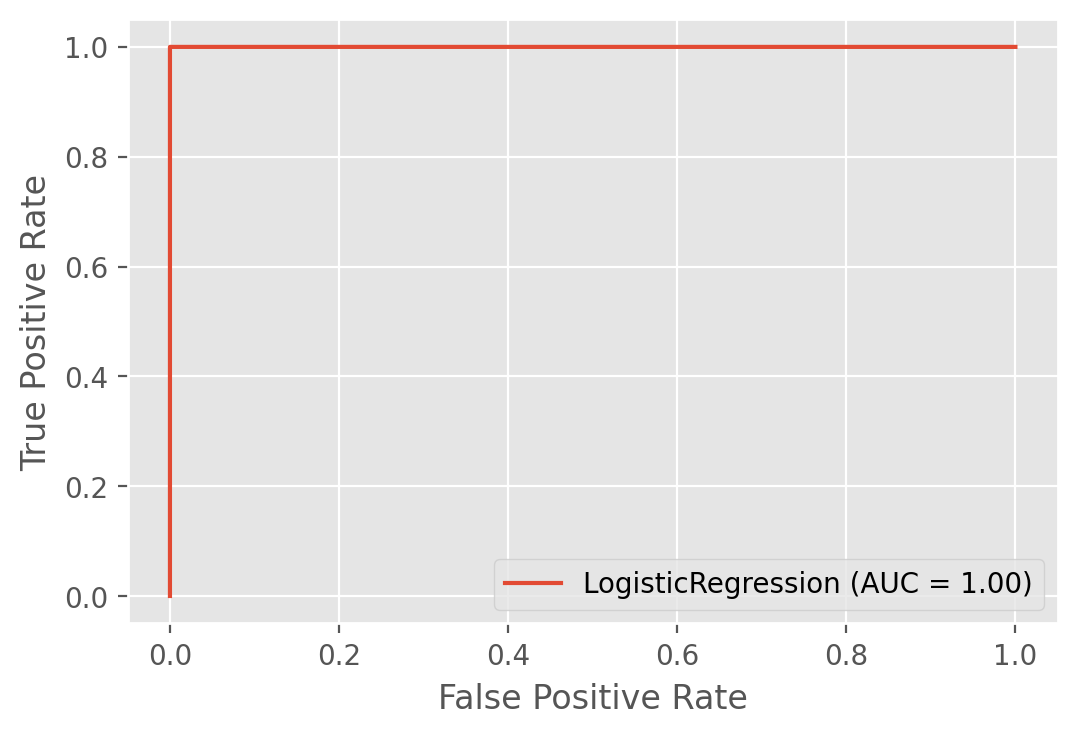

In [36]:
logmodel_disp = plot_roc_curve(logmodel, X_test, y_test)
plt.show()

In [37]:
predsz, preds2z = predictionsz >= .4 ,predictionsz >= .5
for name, coef in zip(preds2z[1:], logmodel.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

False: 0.0086
False: -0.0213
False: -0.0050
False: 0.0728
False: 13.8320
False: -0.0037
False: 0.0146
False: 0.0150
False: 0.0780
True: 0.0962
True: 0.4925
False: 0.4112
False: -0.0051
False: 0.0279
True: -0.1876
False: -0.1778
True: 0.1762
True: 0.1827
True: -0.4102
False: -0.4912
False: 0.4112
True: -0.0808
True: 0.0151
True: 0.0162
False: -0.0112
False: -0.0168
False: 0.0136
False: -0.1249
False: 0.0885
False: 0.1150
False: 0.0512
False: 0.0264


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2z) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [39]:
print(classification_report(y_test,predsz) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [40]:
print(confusion_matrix(y_test,predsz))  

[[27343     0]
 [    0 10296]]


In [41]:
print(confusion_matrix(y_test,preds2z)) 

[[27343     0]
 [    0 10296]]


In [42]:
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

In [43]:
ynot3 = checker3.pop('y_target')
cb3y = cb3.pop('y_target')

train_test_split(cb3, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    cb3,cb3y,test_size = .5, random_state=42)



X = checker3
X_const = add_constant(X, prepend=True)
y3 = ynot3 
logit_model = Logit(y3, X_const).fit()
# PerfectSeparationError: Perfect separation detected, results not available#
# Is the above from not train_test split ?! 

Optimization terminated successfully.
         Current function value: 0.454224
         Iterations 7


In [44]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               y_target   No. Observations:                75278
Model:                          Logit   Df Residuals:                    75250
Method:                           MLE   Df Model:                           27
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:                  0.2249
Time:                        08:33:39   Log-Likelihood:                -34193.
converged:                       True   LL-Null:                       -44113.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3487   9.09e+05   3.83e-07      1.000   -1.78e+06    1.78e+06
Var1                             0.0220      0.019      1.162      0.245      -0.015       0.059
Var2                            -0.0392      0.022     -1.806      0.071      -0.082       0.003
Var3                            -0.0035      0.013     -0.264      0.792      -0.029       0.022
Var5                             0.1374      0.014      9.688      0.000       0.110       0.165
delta_first_reg                 -0.0431        nan        nan        nan         nan         nan
interaction_regreister_delta     0.0245   1.11e+06   2.22e-08      1.000   -2.17e+06    2.17e+06
delta_first_start               -0.0117   8.25e+05  -1.41e-08      1.000   -1.62e+06    1.62e+06
delta_reg_end                    0.1838        nan        nan        nan         nan         nan
Camp_Length                      0.2631        nan        nan        nan         nan         nan
Second                           1.1331        nan        nan        nan         nan         nan
Third                            0.9984   1.38e+14   7.22e-15      1.000   -2.71e+14    2.71e+14
1036                             0.0391      0.045      0.860      0.390      -0.050       0.128
1216                             0.0362      0.040      0.894      0.371      -0.043       0.115
23384                           -0.4064      0.020    -20.727      0.000      -0.445      -0.368
B                               -0.5904        nan        nan        nan         nan         nan
C                                0.7931        nan        nan        nan         nan         nan
D                                0.5063      0.039     12.948      0.000       0.430       0.583
E                               -0.8414        nan        nan        nan         nan         nan
F                               -1.1441        nan        nan        nan         nan         nan
G                                0.9984   1.36e+14   7.33e-15      1.000   -2.67e+14    2.67e+14
2100                            -1.1797        nan        nan        nan         nan         nan
2.0                              0.1199      0.090      1.333      0.182      -0.056       0.296
5.0                              0.0922      0.050      1.847      0.065      -0.006       0.190
8.0                             -0.2563      0.124     -2.067      0.039      -0.499      -0.013
9.0                             -0.1944      0.112     -1.730      0.084      -0.415       0.026
10.0                             0.0780      0.132      0.592      0.554      -0.181       0.337
9999.0                          -0.3042      0.033     -9.309      0.000      -0.368      -0.240
1                                0.3370      0.053      6.409      0.000       0.234       0.440
2                                0.4684      0.050      9.385      0.000       0.371       0.566
3                                0.2275 

In [45]:
y1 = cb20.pop('y_target') 

In [46]:
kfold = KFold(n_splits=5)

accuracies = []
precisions = []
recalls = []

X_train, X_test, y_train, y_test = train_test_split(cb20, y1)

for train_index, test_index in kfold.split(X_train):
    model = LogisticRegression(solver="lbfgs")
    model.fit(X_train.iloc[train_index], y1.iloc[train_index])
    y_predict = model.predict(X_train.iloc[test_index])
    y_true = y1.iloc[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))

print("Accuracy:", np.average(accuracies))
print("Precision:", np.average(precisions))
print("Recall:", np.average(recalls))

/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: Undefi

Accuracy: 0.7217585704029865
Precision: 0.0
Recall: 0.0


/home/allen/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#ynot1 = checker1.pop('y_target')
ynot1 = cb12.pop('y_target')

In [48]:
from sklearn.ensemble import RandomForestClassifier

y = checker7.pop('y_target')
X = checker7

# y = cb7.pop('y_target')
# X = cb7

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)
roc_auc=roc_auc_score(y_test, rfc.predict_proba(X_test)[:, -1])
#roc_auc2 = roc_auc_score(y_test, rfc.decision_function(X_test))


In [49]:
print(roc_auc,'hi'  )

0.8438903869970075 hi


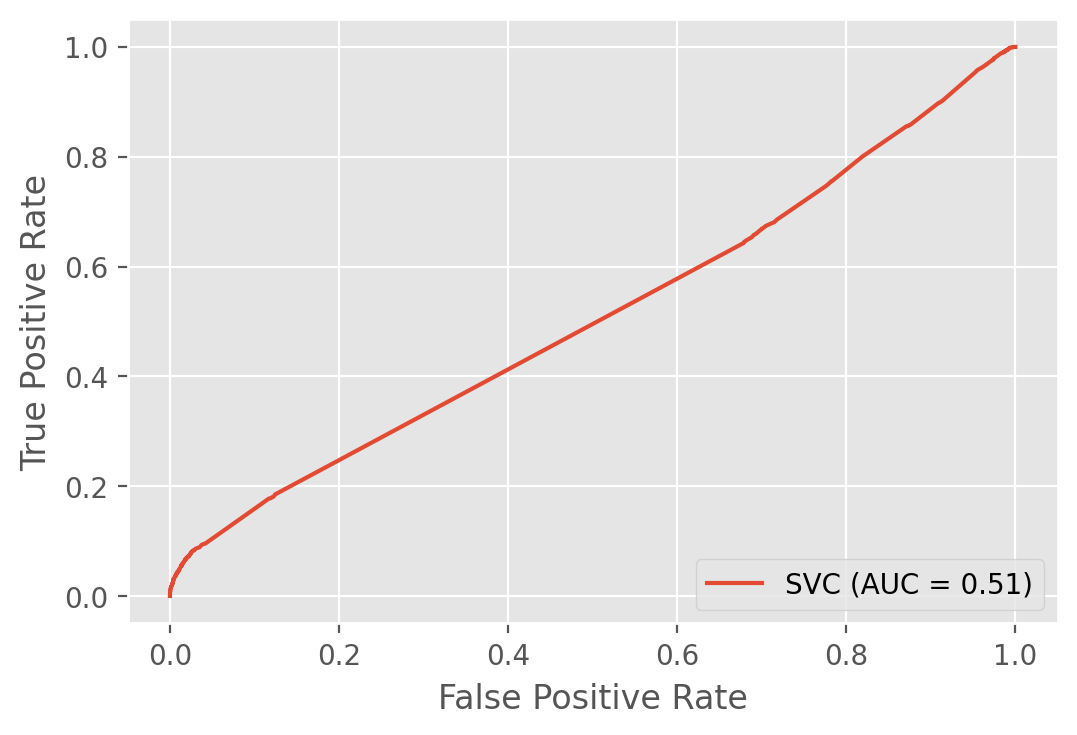

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84     13585
         1.0       0.88      0.01      0.02      5235

    accuracy                           0.72     18820
   macro avg       0.80      0.51      0.43     18820
weighted avg       0.77      0.72      0.61     18820

[[13576     9]
 [ 5170    65]]


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

# y = checker.pop('y_target')
# X = checker

y = cb4.pop('y_target')
X = cb4

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42, probability = True)
svc.fit(X_test4, y_test4)

# rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
# rfc.fit(X_train,y_train)
# rfc_preds = rfc.predict(X_test)


# print(classification_report(y_test,rfc_preds) ) 
# print(confusion_matrix(y_test,rfc_preds)) 

svc_disp = plot_roc_curve(svc, X_test4, y_test4)
plt.show()
svc_preds4 = svc.predict(X_test4)
svc_proba4 = svc.predict_proba(X_test4)[:,1]

pred4 , preds4 = svc_proba4  >= .5 , svc_proba4  >= .4

print(classification_report(y_test4,svc_preds4) )
print(confusion_matrix(y_test4,svc_preds4)) 

print(confusion_matrix(y_test4,svc_proba4)) 

svc_disp = plot_roc_curve(svc, X_test4, y_test4)
plt.show()

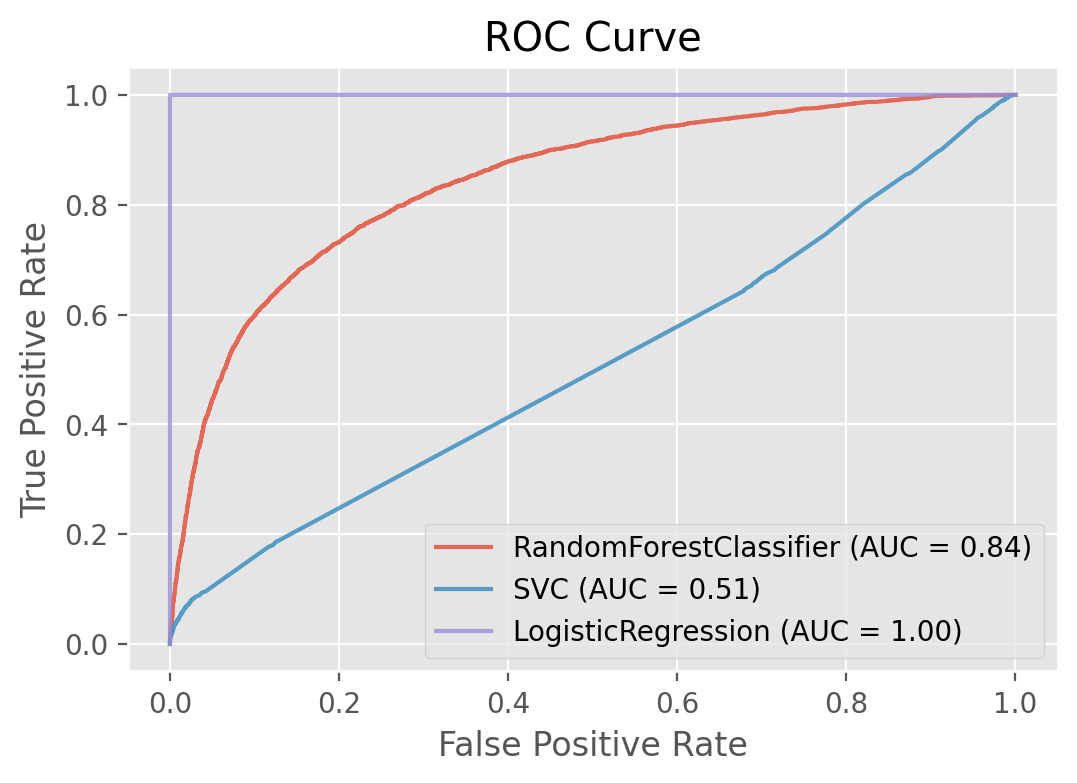

In [51]:
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
y_trained_sum_of1 = [1 for x in y_train.values if x==1]
print(sum(y_trained_sum_of1), len(y_train.values))
y_test_sum_of1 = [1 for x in y_test.values if x==1]
print(sum(y_test_sum_of1),'y_test', len(y_test.values))

In [ ]:
# try and recombine data frame to examine outputs. 

In [ ]:
def cm_to_inch(value):
    return value/2.54

In [ ]:
col_names = X_test.columns 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'Random Forest'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
print(sum(importances))

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
y = cb9.pop('y_target')
x = cb9

In [ ]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(x, y, test_size=0.2, random_state=101) 

In [ ]:
train_dmatrix = xgb.DMatrix(data=X_train9,label=y_train9) 
test_dmatrix = xgb.DMatrix(data=X_test9,label=y_test9)

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
#evallist = [(test_dmatrix, 'eval'), (train_dmatrix, 'train')] ,evallist,early_stopping_rounds=50
xgb_one = xgb.train(params,train_dmatrix )
# AssertionError: Must have at least 1 validation dataset for early stopping. 

In [ ]:
ypred = xgb_one.predict(test_dmatrix, ntree_limit =xgb_one.best_ntree_limit )

In [ ]:
xgb.plot_importance(xgb_one)

In [ ]:
print(ypred)
print(confusion_matrix(y_test9,ypred  ))  

In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc', label_encoder=False)
xg_reg1.fit(X_train9,y_train9) 

In [ ]:
xg_reg1_predict = xg_reg1.predict(X_test9) 
xg_reg1_proba = xg_reg1.predict_proba(X_test9)[:,1]

predsx, preds2x = predx >= .5 ,predx >= .7
, preds2_xg1_thresh2 = xg_reg1_proba >=0.65 , xg_reg1_proba >=0.4

xg_reg1_disp = plot_roc_curve(xg_reg1 , X_test9, y_test9)
plt.show()




In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
xg_reg1_disp2 = plot_roc_curve(xg_reg1, X_test9, y_test9, ax=ax, alpha=0.8) 
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)

 
plt.show()

In [ ]:
print(classification_report(y_test9,preds_xg1_thresh1 ) )
print(classification_report(y_test9,preds2_xg1_thresh2 ) )

In [ ]:
print(confusion_matrix(y_test9,preds_xg1_thresh1))  
print(confusion_matrix(y_test9,preds2_xg1_thresh2))  

In [ ]:
[[6166 1409]
 [ 872 2092]]

[[6956  619]
 [1372 1592]]


In [63]:
pint45 = 1409+2092
pint35 = 619+1592 
print(pint45,pint35)

3501 2211


In [ ]:

for i in ok:
    for ii in i :
        print(f'this is a thing from i -> {ii} being printed')
        
        

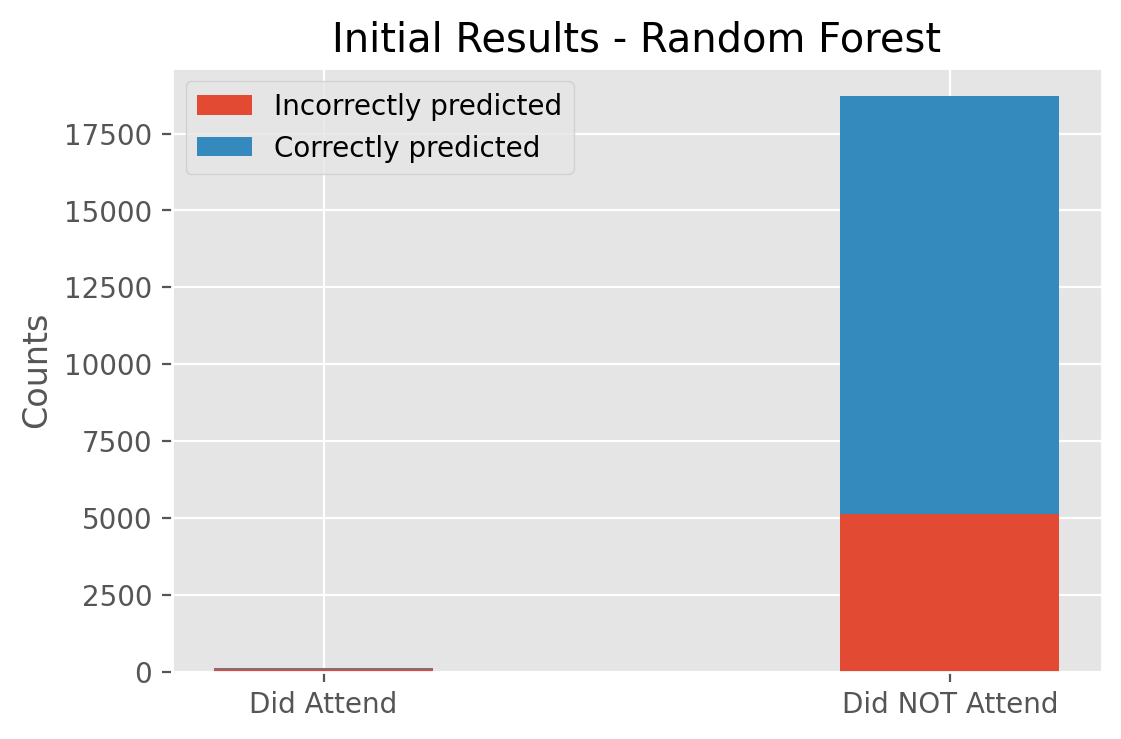

In [73]:
# svc_base = [[13576     9]
#  [ 5170    65]]

# [[13589    71]
#  [ 5122    38]]

# [15154,  1510], 
# [ 2334,  ]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [71,5122] # bottom part of column
tops = [ 38 ,13589 ] # Top part of column

# men_std = [2, 3, 4, 1, 2] # currently not plotting std
# women_std = [3, 5, 2, 3, 3] # currently no plotting std

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, bottoms, width, label='Incorrectly predicted')
ax.bar(labels, tops, width, bottom=bottoms,
       label='Correctly predicted')

ax.set_ylabel('Counts')
ax.set_title('Initial Results - Random Forest')
ax.legend()

plt.show()


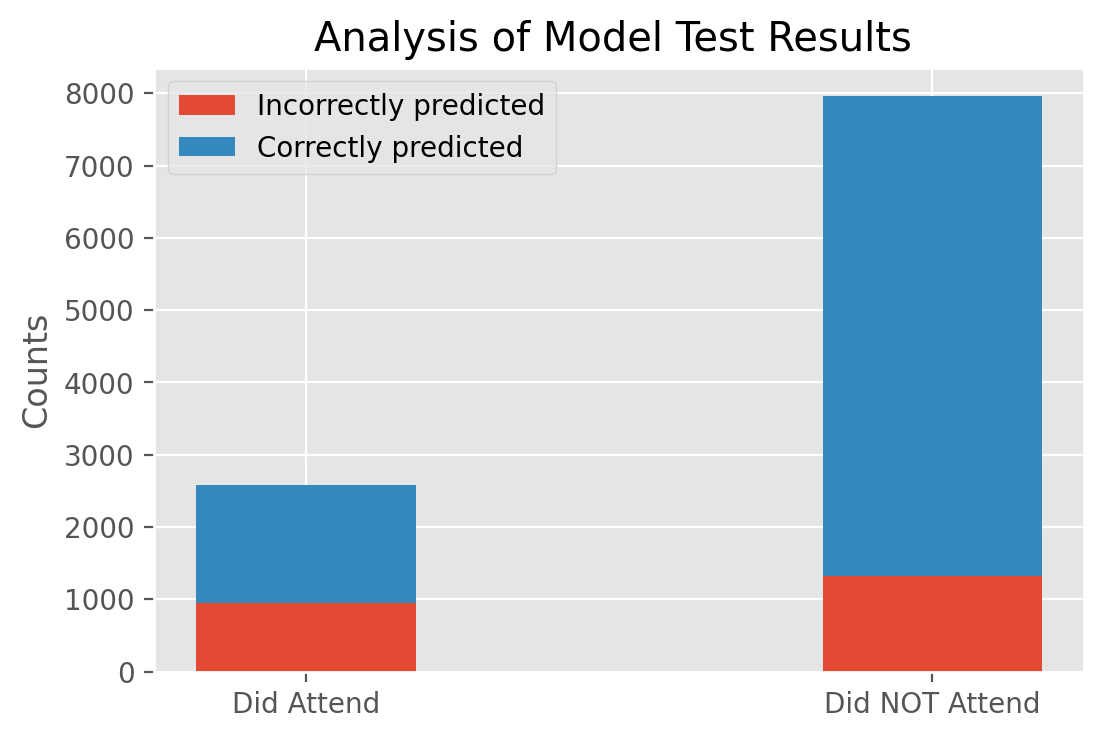

In [52]:
ok=[[6633,  942],
 [1326, 1638]]

rf = 2269,1545,
3651,6633 #1545/3651
 

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] # Top part of column

# men_std = [2, 3, 4, 1, 2] # currently not plotting std
# women_std = [3, 5, 2, 3, 3] # currently no plotting std

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, bottoms, width, label='Incorrectly predicted')
ax.bar(labels, tops, width, bottom=bottoms,
       label='Correctly predicted')

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()


In [ ]:
'''
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] # Top part of column

'''


boost = 1510,2334 ,3586,15154

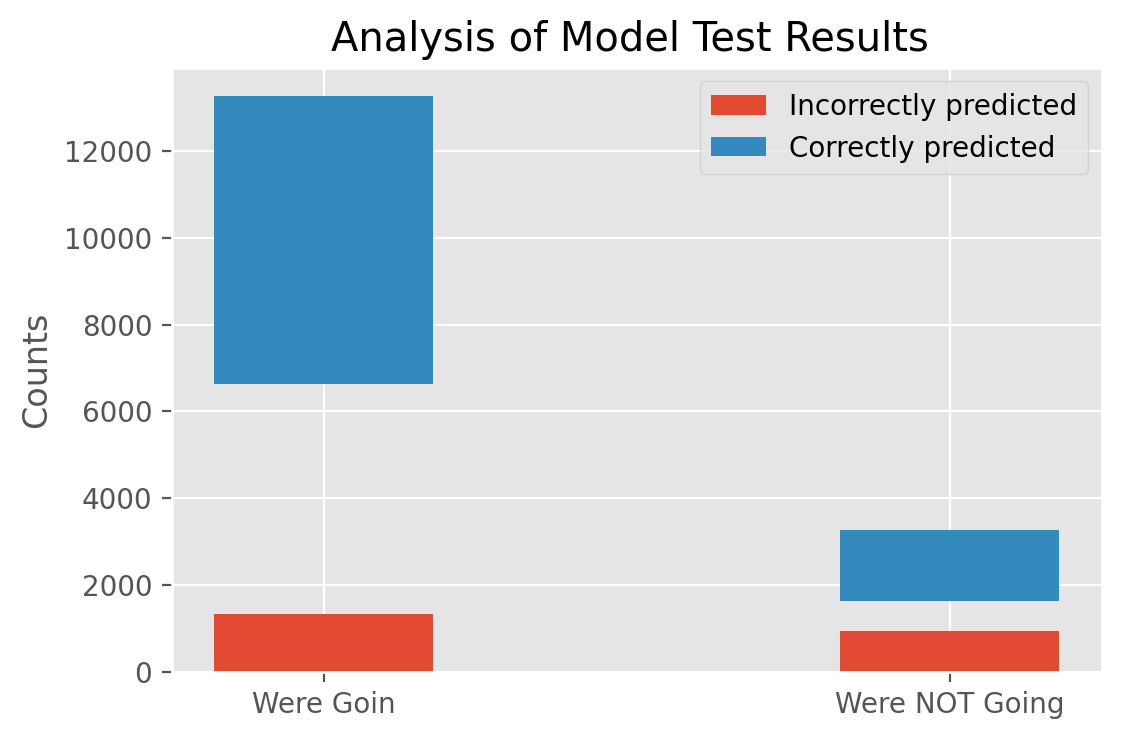

In [55]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Were Goin', 'Were NOT Going'] # model Names
bottoms = [1326,942] # bottom part of column
tops = [ 6633,1638 ] # Top part of column

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, bottoms,width,label='Incorrectly predicted')
ax.bar(labels, tops, width, label='Correctly predicted',bottom=tops,)

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()

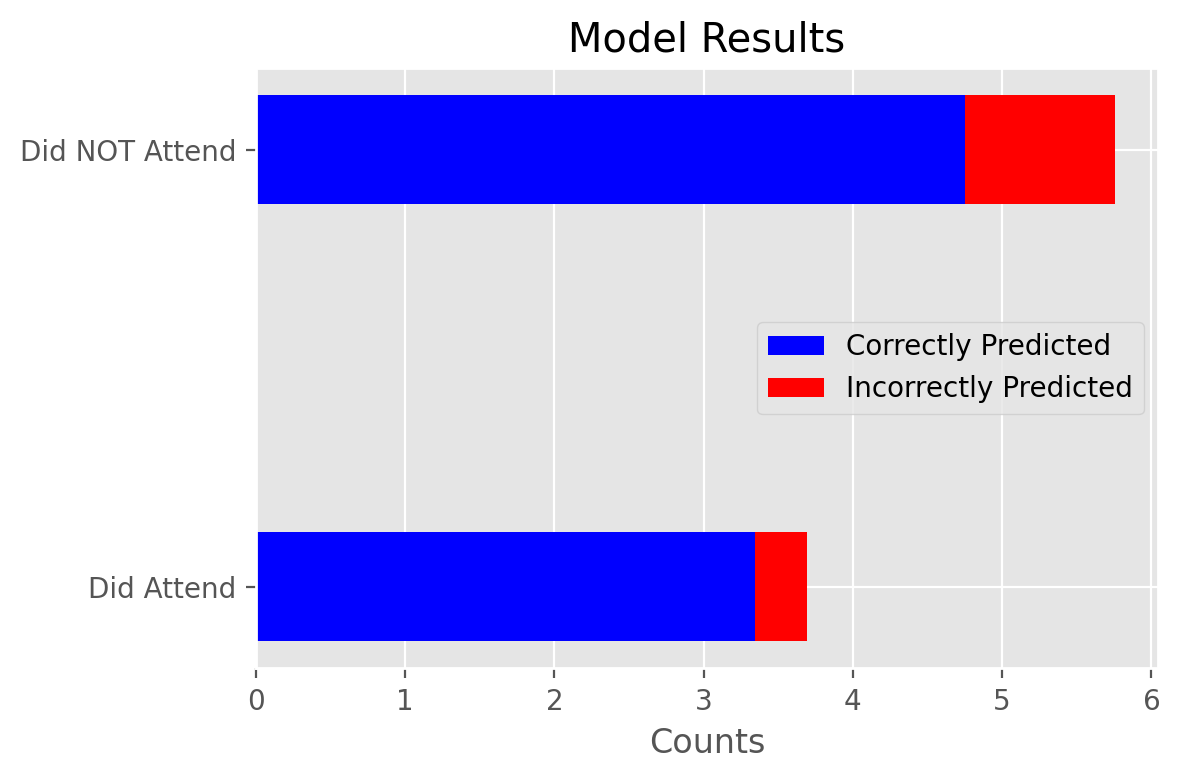

In [68]:
from datetime import datetime
import matplotlib.pyplot as plt

jobs = ['Did Attend','Did NOT Attend']

# input wait times
waittimesin = ['03:20:50','04:45:10']
# converting wait times to float
waittimes = []
for wt in waittimesin:
    waittime = datetime.strptime(wt,'%H:%M:%S')
    waittime = waittime.hour + waittime.minute/60 + waittime.second/3600
    waittimes.append(waittime)

# input run times
runtimesin = ['00:20:50','01:00:10']
# converting run times to float    
runtimes = []
for rt in runtimesin:
    runtime = datetime.strptime(rt,'%H:%M:%S')
    runtime = runtime.hour + runtime.minute/60 + runtime.second/3600
    runtimes.append(runtime)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(jobs, waittimes, align='center', height=.25, color='b',label='Correctly Predicted')
ax.barh(jobs, runtimes, align='center', height=.25, left=waittimes, color='r',label='Incorrectly Predicted')
ax.set_yticks(jobs)
ax.set_xlabel('Counts')
ax.set_title('Model Results')
ax.grid(True)
ax.legend()
plt.tight_layout()
#plt.savefig('C:\\Data\\stackedbar.png')
plt.show()

bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] 

In [76]:
4800*14.7

70560.0

In [65]:
188543/353064

0.5340193279405434

In [ ]:
y = checker4.pop('y_target')
x = checker4
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.2, random_state=101) 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc')

In [ ]:
xg_reg1.fit(X_train4,y_train4)

In [ ]:
tree1_predict = xg_reg1.predict(X_test4) 
tree1_proba = xg_reg1.predict_proba(X_test4)

In [ ]:
predsx, preds2x = tree1_proba >= .5 ,tree1_proba >= .4
print(classification_report(y_test4,tree1_predict ) )
print(confusion_matrix(y_test4,tree1_predict)) 

In [ ]:

col_names = X_test4.columns 
importances = xg_reg1.feature_importances_
indices = np.argsort(importances)[::-1]
title = 'XG Boost Classifier'
plt.bar(range(X_test4.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(title))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test4.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test4.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))


In [ ]:
xg_reg1_disp = plot_roc_curve(xg_reg1, X_test4, y_test4)
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
uh = xgb_clf.predict(X_test) 
pred_proba = xgb_clf.predict_proba(X_test)

In [ ]:
probs = pred_proba[:,1] 

In [ ]:
col_names = X_test.columns 
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xgb_clf'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(20)))

In [ ]:
# plotdf = pd.DataFrame({"P1":uh ,"P2":probs})
# # ax = plotdf.plot.bar(color=["SkyBlue", "IndianRed"], rot=0, title= "COmpare Results")
# # plt.show()

# df = plotdf.copy()
# df.info()

In [ ]:
df1=df.copy()
for i in to_transfer:
    df1[i] = X_test[i]
print(df1.info())

In [ ]:
 # https://stackoverflow.com/questions/57730192/how-to-save-gridsearchcv-xgboost-model

In [ ]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 8, n_estimators = 10, eval_metric = 'auc')

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
print(xg_reg.predict_proba(X_test)) 

In [ ]:
preds

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
cv_results[45:]

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200 
# xgb.plot_tree(xg_reg,num_trees=0) # plt.rcParams['figure.figsize'] = [50, 10] # plt.show()

In [ ]:
xgb.plot_importance(xg_reg )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
print(checker3.shape)

In [ ]:
col_names = X_test.columns 
importances = xg_reg.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xg_reg'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
dataset = np.genfromtxt('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv',delimiter=',' ,skip_header=True)

In [ ]:
print(dataset.shape)

In [ ]:
selector = [x for x in range(dataset.shape[1]) if x !=5]
selector2 = [x for x in range(dataset.shape[1]) if x ==5]

In [ ]:
y = dataset[:,selector]
y2 = dataset[:,selector2]

In [ ]:
y.shape

In [ ]:
x = np.delete(dataset,6,axis=1)

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1,input_dim = 46, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
if gpus:
    try: 
        for gpu in gpus:
            tensorflow.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e, 'BTW ***********************************************')

In [ ]:
model.fit(x=y,y=y2, epochs=20, verbose=1)

In [ ]:
print(y2[:10])

In [ ]:
predictions2 = model.predict(y)
print(predictions2[:10].T)